<a href="https://colab.research.google.com/github/HenryZumaeta/MASTER/blob/Zeta/STAT/TrabajoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

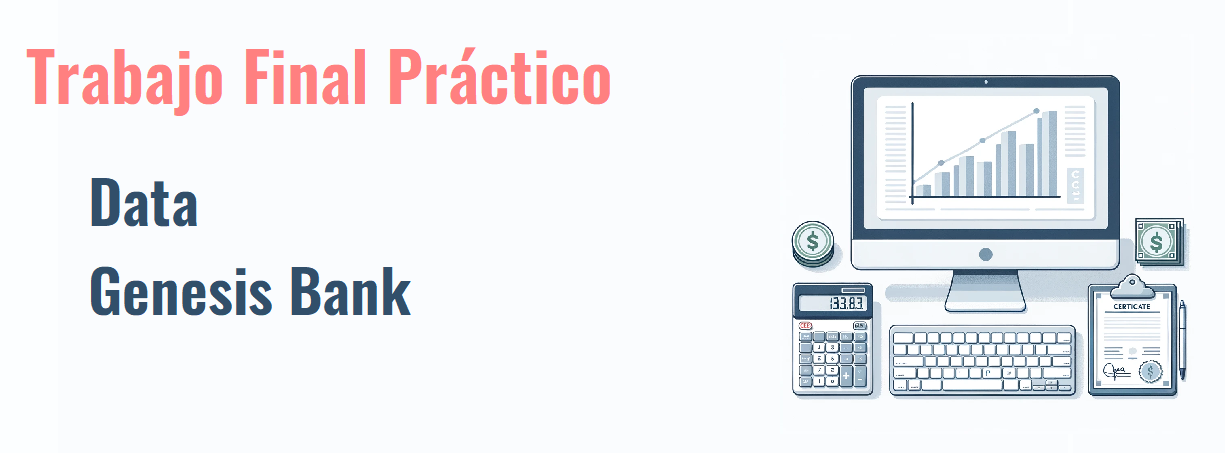

---

**RESUMEN:**

Genesis está explorando la diversificación mediante certificados de depósitos (CD). Aunque actualmente se basan en criterios expertos y demográficos para sus objetivos, el Director de Marketing (CMO) cree que las estrategias de venta cruzada podrían ser más rentables con un enfoque diferente.

---

**MUESTREO:**

Probabilístico

---

**OBJETIVOS:**

Usar los conceptos de aprendidos en clases:

Tener un perfil de los clientes
Identificar las variables

---

**MATERIALES DE TRABAJO:**

Para el desarrollo del trabajo se tiene:

Genesis Data Calibration.xlsx: Es la base de datos a trabajar

Diccionario.pdf: Contiene el diccionario de las variables

---

**NOTA:**

El código está desarrollado en su mayoría en Python, pero también incluye R en la parte de EDA.

---



# LIBRERÍAS

In [ ]:
# @title Instalando R en Colab
# Instalando R en Colab
!apt-get install r-base

# Integracion entre R y Python
!pip install rpy2

# Usar R en Colab
%load_ext rpy2.ipython

## Instalación de librerías de R

In [ ]:
# Instalando paquetes de R a usar
%%R
install.packages("readr")
install.packages("DataExplorer")

## Cargando librerías de Python

In [ ]:
# Cargamos las librerías:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import binom
from sklearn.metrics import matthews_corrcoef

# CARGA DE LA DATA

In [ ]:
link = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSPjIZCszUkS_Nhpx45uq6SQSXXOyTjRU0nyIKf33yn062YpBke4YVyXlK9YciSUA/pub?gid=1312601415&single=true&output=csv"
df = pd.read_csv(link)

In [ ]:
df.head()

,Customer,Purchase,CHFREE,SAVINGS,CDS,MMA,MTG,HMVAL,INC,LOR,CHLD,AGE
0,1,1,0,0,1,0,0,1,6,1,4,4
1,3,0,0,1,1,0,0,0,0,0,0,3
2,4,1,0,0,1,1,0,0,5,1,0,6
3,5,1,0,0,1,0,0,0,3,1,5,6
4,6,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
%%R -i link
library(readr)

dfR <-read_csv(link, show_col_types = FALSE)
dfR

# A tibble: 14,963 × 12
   Customer Purchase CHFREE SAVINGS   CDS   MMA   MTG HMVAL   INC   LOR  CHLD
      <dbl>    <dbl>  <dbl>   <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1        1        1      0       0     1     0     0     1     6     1     4
 2        3        0      0       1     1     0     0     0     0     0     0
 3        4        1      0       0     1     1     0     0     5     1     0
 4        5        1      0       0     1     0     0     0     3     1     5
 5        6        0      0       0     0     0     0     0     0     0     0
 6        7        0      0       0     0     1     0     0     5     2     0
 7        8        1      0       0     1     0     0     0     0     0     0
 8        9        0      0       0     0     0     0     7     6     1     2
 9       10        0      0       0     0     0     0     0     0     0     0
10       12        0      1       0     1     1     0     5     6     1     4
# ℹ 14,953 more rows
# ℹ 1 more variable

# EDA

## Visualización general de la data

In [ ]:
%%R
library(DataExplorer)

# Resumen de la data
introduce(dfR)

# A tibble: 1 × 9
   rows columns discrete_columns continuous_columns all_missing_columns
  <int>   <int>            <int>              <int>               <int>
1 14963      12                0                 12                   0
# ℹ 4 more variables: total_missing_values <int>, complete_rows <int>,
#   total_observations <int>, memory_usage <dbl>


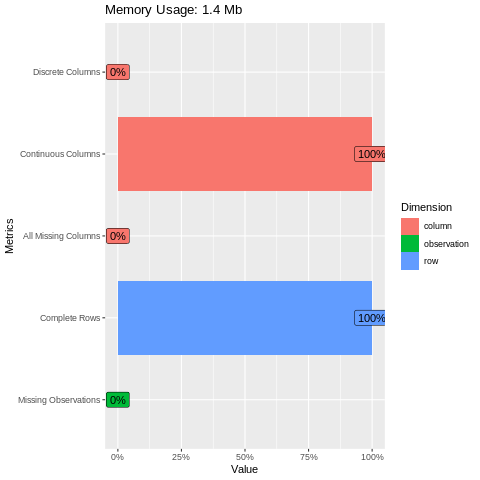

In [ ]:
%%R
library(DataExplorer)

# Resumen de la data
plot_intro(dfR)

El gráfico de barras representa las diferentes métricas:

**Discrete Columns:** El 0% de las columnas en el conjunto de datos son
discretas.

**Continuous Columns:** El 100% de las columnas en el conjunto de datos son continuas.

**All Missing Columns:** No hay columnas (0.0%) en el conjunto de datos que tengan todos sus valores faltantes.

**Complete Rows:** El 100% de las filas en el conjunto de datos están completas, es decir, no tienen ningún valor faltante.

**Missing Observations:** El 0% de las observaciones en el conjunto de datos están faltantes

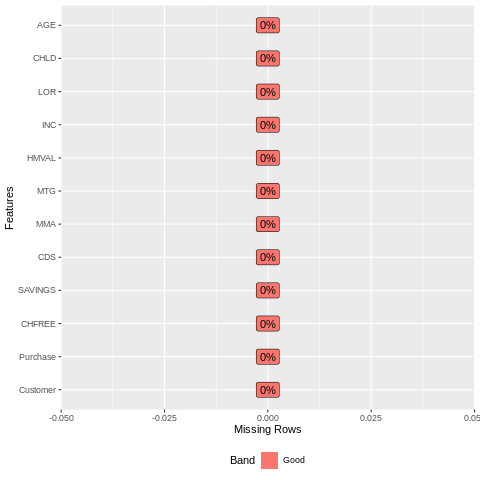

In [ ]:
%%R
# Ahora data está disponible en R
library(DataExplorer)

# Valores faltantes o missing
plot_missing(dfR)

In [ ]:
%%R
# Ahora data está disponible en R
library(DataExplorer)

# Valores faltantes o missing
profile_missing(dfR)

# A tibble: 12 × 3
   feature  num_missing pct_missing
   <fct>          <int>       <dbl>
 1 Customer           0           0
 2 Purchase           0           0
 3 CHFREE             0           0
 4 SAVINGS            0           0
 5 CDS                0           0
 6 MMA                0           0
 7 MTG                0           0
 8 HMVAL              0           0
 9 INC                0           0
10 LOR                0           0
11 CHLD               0           0
12 AGE                0           0


En el gráfico y a nivel numérico, es evidente que no hay datos nulos. Con la información completa, se eligen las variables esenciales para el análisis. Aunque la mayoría de las variables se incluyen, no se considerará la variable `"Customer"` por ser el identificador de los registros.


In [ ]:
df_short=df[['Purchase','CHFREE','SAVINGS','CDS','MMA','MTG','HMVAL','INC','LOR','CHLD','AGE']]
df_short.head(10)

,Purchase,CHFREE,SAVINGS,CDS,MMA,MTG,HMVAL,INC,LOR,CHLD,AGE
0,1,0,0,1,0,0,1,6,1,4,4
1,0,0,1,1,0,0,0,0,0,0,3
2,1,0,0,1,1,0,0,5,1,0,6
3,1,0,0,1,0,0,0,3,1,5,6
4,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,5,2,0,0
6,1,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,7,6,1,2,4
8,0,0,0,0,0,0,0,0,0,0,2
9,0,1,0,1,1,0,5,6,1,4,4


In [ ]:
#para saber los tipos de variables
df_short.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Purchase  14963 non-null  int64
 1   CHFREE    14963 non-null  int64
 2   SAVINGS   14963 non-null  int64
 3   CDS       14963 non-null  int64
 4   MMA       14963 non-null  int64
 5   MTG       14963 non-null  int64
 6   HMVAL     14963 non-null  int64
 7   INC       14963 non-null  int64
 8   LOR       14963 non-null  int64
 9   CHLD      14963 non-null  int64
 10  AGE       14963 non-null  int64
dtypes: int64(11)
memory usage: 1.3 MB


## Nulos

In [ ]:
#identificamos el numero de valores nulos
df_short.isnull().sum().sum()

0

<Axes: >

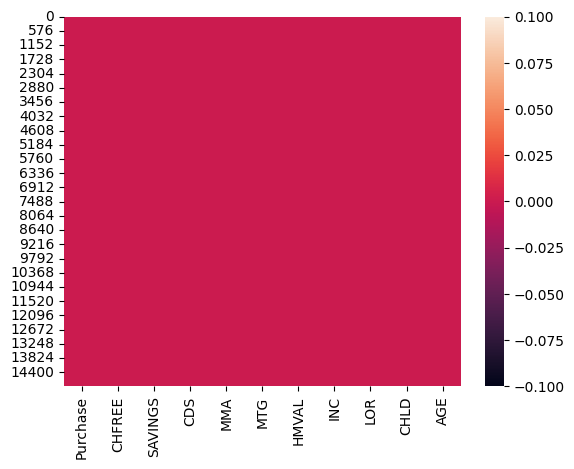

In [ ]:
#graficamos para ver si disponemos de valores nulos
sns.heatmap(df_short.isnull())

## Estadísticos, Gráficos iniciales

In [ ]:
df_short.describe().T.apply(lambda s: s.apply('{0:.2f}'.format))  ## describe las variables

,count,mean,std,min,25%,50%,75%,max
Purchase,14963.00,0.25,0.43,0.00,0.00,0.00,1.00,1.00
CHFREE,14963.00,0.11,0.32,0.00,0.00,0.00,0.00,1.00
SAVINGS,14963.00,0.14,0.35,0.00,0.00,0.00,0.00,1.00
CDS,14963.00,0.30,0.46,0.00,0.00,0.00,1.00,1.00
MMA,14963.00,0.12,0.32,0.00,0.00,0.00,0.00,1.00
MTG,14963.00,0.01,0.11,0.00,0.00,0.00,0.00,1.00
HMVAL,14963.00,2.84,1.90,0.00,1.00,3.00,4.00,7.00
INC,14963.00,4.67,2.19,0.00,3.00,5.00,6.00,9.00
LOR,14963.00,2.59,1.61,0.00,1.00,3.00,3.00,5.00
CHLD,14963.00,3.31,1.68,0.00,2.00,4.00,5.00,6.00


In [ ]:
plt.style.use('ggplot')  # Estilo a 'ggplot'

def graficar_frecuencias(df):
    num_filas, num_columnas = 3, 4
    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 9))  # Ajusta el tamaño

    for (col, ax) in zip(df.columns, axes.flat):
        # Calcular las frecuencias relativas en porcentaje
        frecuencias = df[col].value_counts(normalize=True) * 100
        barras = ax.barh(frecuencias.index, frecuencias)

        ax.set_title(f'{col}')

        # Estilizar los títulos y etiquetas
        ax.title.set_fontsize(14)
        ax.set_yticks(frecuencias.index)  # Valores únicos en el eje Y
        ax.xaxis.set_visible(False)  # Ocultar las etiquetas del eje x

        # Agregar etiquetas a cada barra
        for barra in barras:
            xval = barra.get_width()
            ax.text(xval + 0.5, barra.get_y() + barra.get_height()/2, f"{round(xval, 2)}%", va='center', ha='left', fontsize=10)

    for i in range(len(df.columns), num_filas * num_columnas):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()


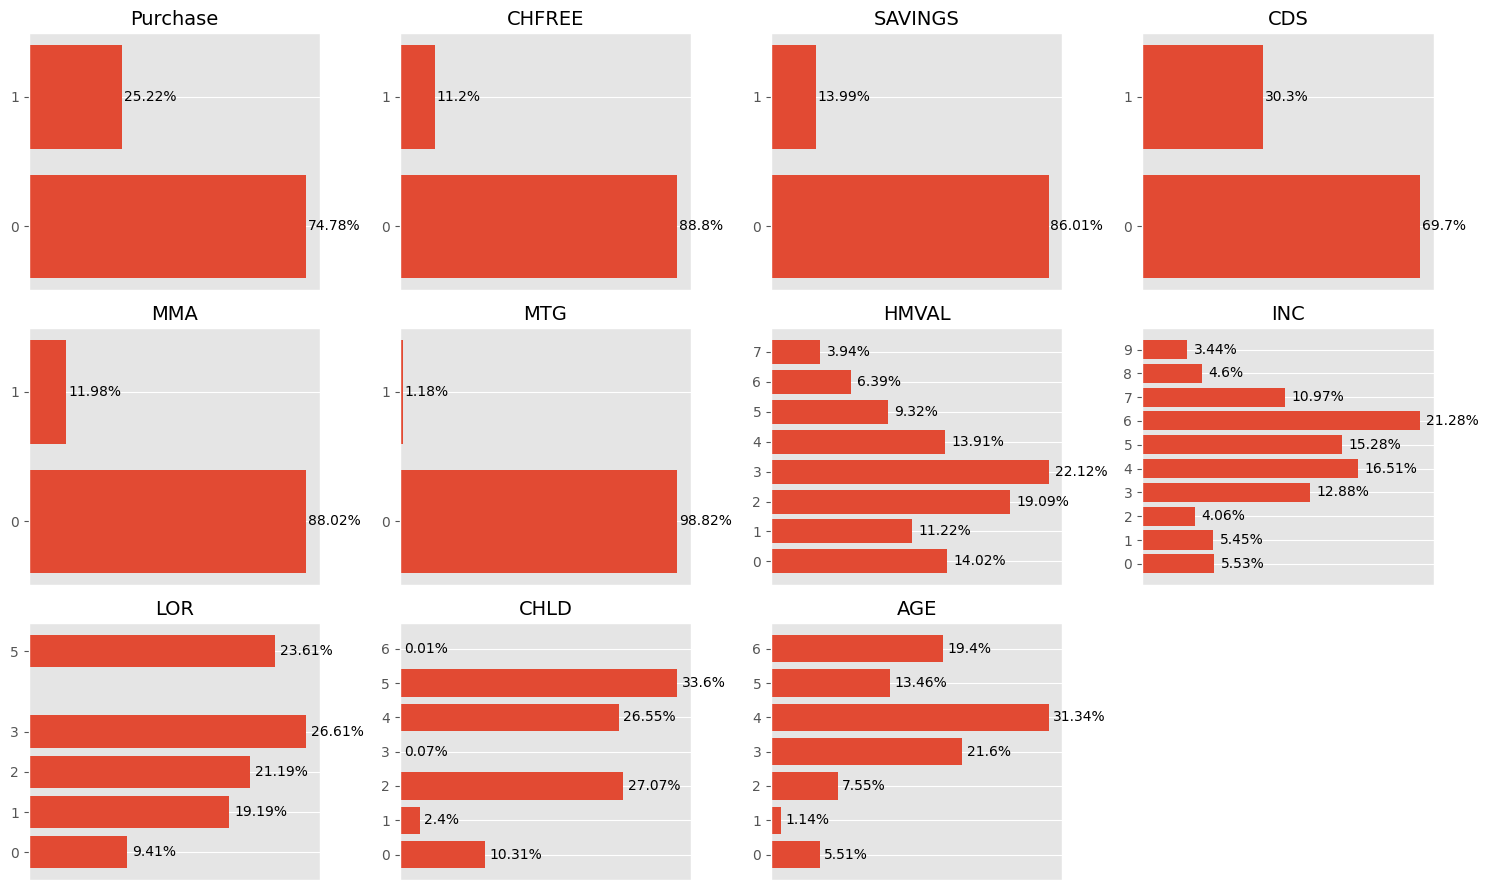

In [ ]:
graficar_frecuencias(df_short)

# ENTENDIMIENTO DE LOS DATOS

SEPARACION POR TIPO DE VARIABLE

In [ ]:
df_nom_bi=df[['Purchase','CHFREE','SAVINGS','CDS','MMA','MTG']]
df_ord=df[['HMVAL','INC','AGE']]
df_num=df[['LOR','CHLD']]

## Correlaciones

Numéricas

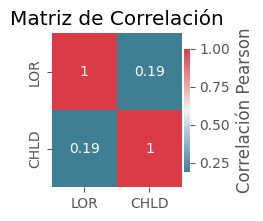

In [ ]:
# Calcula la matriz de correlación
corr = df_num.corr(method='pearson')

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(2, 2))

# Mostrar la matriz de correlación
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap, cbar_kws={'label': 'Correlación Pearson', 'pad': 0.01, 'shrink': 0.8}, ax=ax)

# Título
ax.set_title("Matriz de Correlación")

plt.show()

Ordinales

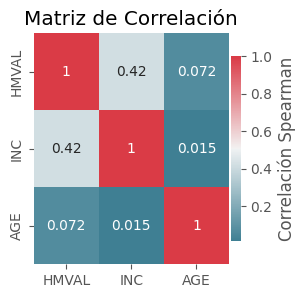

In [ ]:
# Calcula la matriz de correlación
corr = df_ord.corr(method='spearman')

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(3, 3))

# Mostrar la matriz de correlación
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap, cbar_kws={'label': 'Correlación Spearman', 'pad': 0.01, 'shrink': 0.8}, ax=ax)

# Título
ax.set_title("Matriz de Correlación")

plt.show()

Nominal Binaria

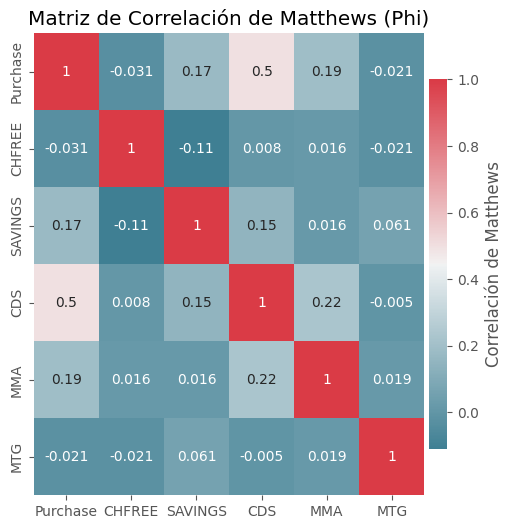

In [ ]:
# Crea un DataFrame vacío para la matriz de correlación de Matthews
mcc_corr = pd.DataFrame(index=df_nom_bi.columns, columns=df_nom_bi.columns)

# Rellena el DataFrame con los valores del coeficiente de Matthews para cada par de columnas
for col1 in df_nom_bi.columns:
    for col2 in df_nom_bi.columns:
        mcc_corr.loc[col1, col2] = matthews_corrcoef(df_nom_bi[col1], df_nom_bi[col2])

# Convierte el DataFrame a tipo float
mcc_corr = mcc_corr.astype(float).round(3)

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(6, 6))

# Mostrar la matriz de correlación
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(mcc_corr, annot=True, cmap=cmap, cbar_kws={'label': 'Correlación de Matthews', 'pad': 0.01, 'shrink': 0.8}, ax=ax)

# Título
ax.set_title("Matriz de Correlación de Matthews (Phi)")

plt.show()

## Variable Target


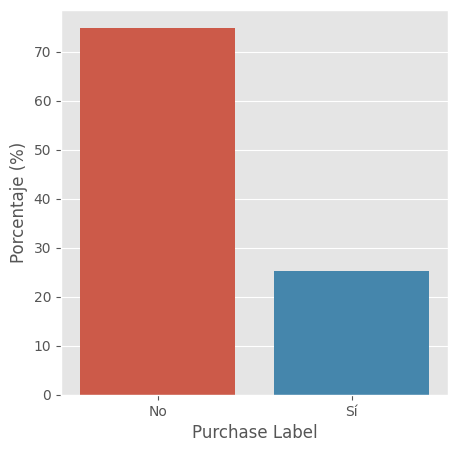

  Value  Frequency
0    No   0.747845
1    Sí   0.252155


In [ ]:
# GRÁFICO:
# Reemplaza los valores
df_short['Purchase Label'] = df_short['Purchase'].replace({0: 'No', 1: 'Sí'})

# Calcular el porcentaje de cada categoría
purchase_percentage = df_short['Purchase Label'].value_counts(normalize=True) * 100

# Convertir la serie en un DataFrame para visualizar con seaborn
df_percentage = purchase_percentage.reset_index()
df_percentage.columns = ['Purchase Label', 'Percentage']

# Crear el gráfico con seaborn
plt.figure(figsize=(5, 5))
sns.barplot(x='Purchase Label', y='Percentage', data=df_percentage)
plt.ylabel('Porcentaje (%)')
plt.show()

# TABLA FRECUENCIAS
# Usando value_counts para obtener las frecuencias relativas y luego ordenándolas por índice
series_output = df_short['Purchase'].value_counts(1).sort_index()

# Convirtiendo la serie en un DataFrame
df_output = series_output.reset_index()
df_output.columns = ['Value', 'Frequency']

# Reemplazar los valores 0 y 1 por 'No' y 'Sí'
df_output['Value'] = df_output['Value'].replace({0: 'No', 1: 'Sí'})

print(df_output)

Aproximadamente el 25% de las personas compraron el producto, siendo el ratio general de 25%

## Variables cuantitativas

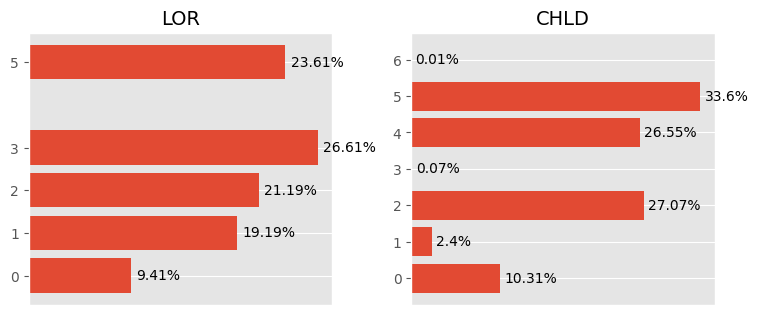

In [ ]:
graficar_frecuencias(df_num)

En la variable LOR (Número de cartas de referencia), los registros más comunes corresponden a 1, 2, 3 y 5 cartas, sin registros de 4 cartas. Asimismo, se observa que el 9.41% de los clientes no cuenta con cartas de referencia.




## Variables cualitativas(Frecuencia-Probabilidades)

### CHFREE

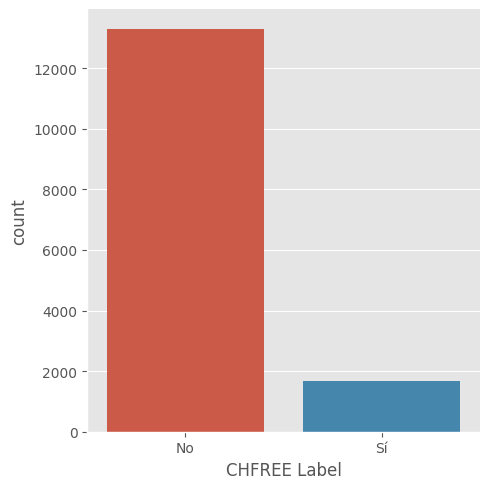

  Value  Frequency
0    No    0.88799
1    Sí    0.11201


In [ ]:
# GRÁFICO:
# Reemplaza los valores 0 y 1 en la columna por 'No' y 'Sí'
df_short['CHFREE Label'] = df_short['CHFREE'].replace({0: 'No', 1: 'Sí'})

# Crea el gráfico con la nueva columna
sns.catplot(x='CHFREE Label', data=df_short, kind="count")

plt.show()

# TABLA FRECUENCIAS
# Usando value_counts para obtener las frecuencias relativas y luego ordenándolas por índice
series_output = df_short['CHFREE'].value_counts(1).sort_index()

# Convirtiendo la serie en un DataFrame
df_output = series_output.reset_index()
df_output.columns = ['Value', 'Frequency']

# Reemplazar los valores 0 y 1 por 'No' y 'Sí'
df_output['Value'] = df_output['Value'].replace({0: 'No', 1: 'Sí'})

print(df_output)

En la variable `CHFREE` (Dispone el cliente de una cuenta gratuita), el valor de `Sí` tiene el 11.20% de casos del total de las observaciones

       Purchase                   
          count   sum Probabilidad
CHFREE                            
0         13287  3413     0.256868
1          1676   360     0.214797


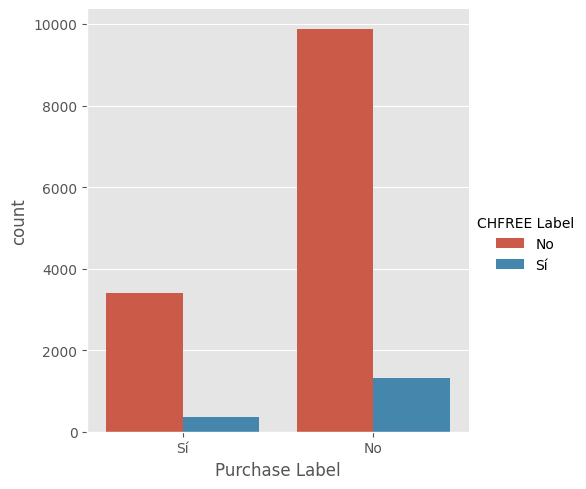

In [ ]:
# GRÁFICO
sns.catplot(x='Purchase Label',data=df_short,hue='CHFREE Label', kind="count")

# TABLA DE PROBABILIDADES
result = df_short[['CHFREE', 'Purchase']].groupby(['CHFREE'], as_index=False).agg(['count','sum','mean']).sort_values(by=('Purchase', 'mean'), ascending=False)
result = result.rename(columns={'mean': 'Probabilidad'})
print(result)

En la variable `CHFREE`, los clientes que `no disponen de una cuenta gratuita` tienen mayor probabilidad que `sí compre el certificado de depósito` respecto a los clientes que `sí disponen de una cuenta gratuita` (25.69% vs  21.48%), siendo esta probabilidad mayor que el `ratio general (25%)`.

### SAVINGS

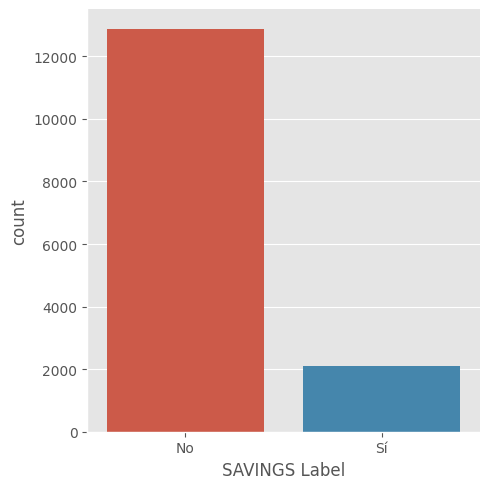

  Value  Frequency
0    No   0.860122
1    Sí   0.139878


In [ ]:
# GRÁFICO:
# Reemplaza los valores 0 y 1 en la columna por 'No' y 'Sí'
df_short['SAVINGS Label'] = df_short['SAVINGS'].replace({0: 'No', 1: 'Sí'})

# Crea el gráfico con la nueva columna
sns.catplot(x='SAVINGS Label', data=df_short, kind="count")

plt.show()

# TABLA FRECUENCIAS
# Usando value_counts para obtener las frecuencias relativas y luego ordenándolas por índice
series_output = df_short['SAVINGS'].value_counts(1).sort_index()

# Convirtiendo la serie en un DataFrame
df_output = series_output.reset_index()
df_output.columns = ['Value', 'Frequency']

# Reemplazar los valores 0 y 1 por 'No' y 'Sí'
df_output['Value'] = df_output['Value'].replace({0: 'No', 1: 'Sí'})

print(df_output)

En la variable `SAVINGS` (Dispone el cliente una cuenta de ahorro), el valor de `Sí` tiene el 13.99% de casos del total de las observaciones

        Purchase                   
           count   sum Probabilidad
SAVINGS                            
1           2093   920     0.439560
0          12870  2853     0.221678


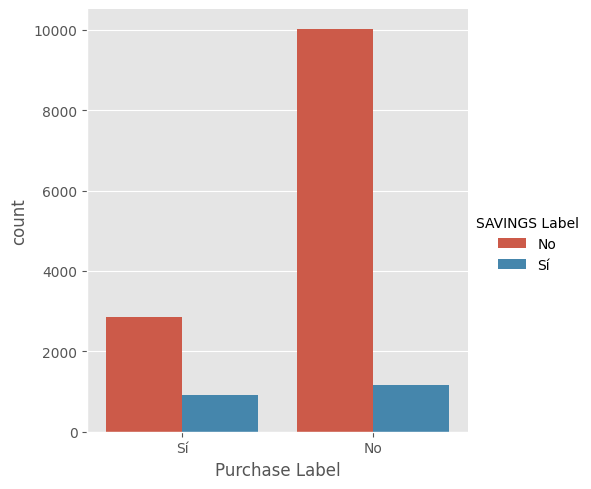

In [ ]:
# GRÁFICO
sns.catplot(x='Purchase Label',data=df_short,hue='SAVINGS Label', kind="count")

# TABLA DE PROBABILIDADES
result_SAVINGS = df_short[['SAVINGS', 'Purchase']].groupby(['SAVINGS'], as_index=False).agg(['count','sum','mean']).sort_values(by=('Purchase', 'mean'), ascending=False)
result_SAVINGS = result_SAVINGS.rename(columns={'mean': 'Probabilidad'})
print(result_SAVINGS)

En la variable `SAVINGS`, los clientes que `sí disponen de una cuenta de ahorro` tienen mayor probabilidad que `sí compre el certificado de depósito` respecto a los clientes que `no disponen de una cuenta de ahorro` (43.96% vs  22.17%), siendo esta probabilidad mayor que el `ratio general (25%)`.

### **CDS**

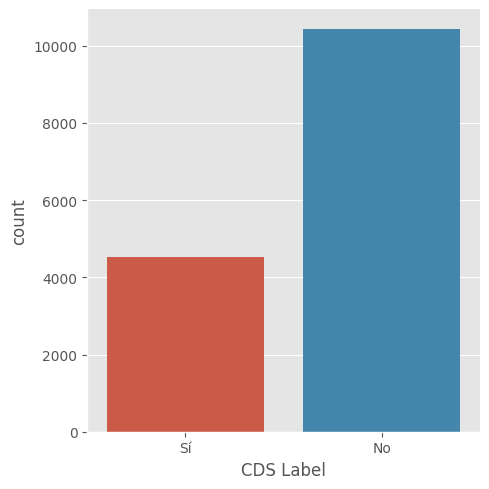

  Value  Frequency
0    No   0.696986
1    Sí   0.303014


In [ ]:
# GRÁFICO:
# Reemplaza los valores 0 y 1 en la columna por 'No' y 'Sí'
df_short['CDS Label'] = df_short['CDS'].replace({0: 'No', 1: 'Sí'})

# Crea el gráfico con la nueva columna
sns.catplot(x='CDS Label', data=df_short, kind="count")

plt.show()

# TABLA FRECUENCIAS
# Usando value_counts para obtener las frecuencias relativas y luego ordenándolas por índice
series_output = df_short['CDS'].value_counts(1).sort_index()

# Convirtiendo la serie en un DataFrame
df_output = series_output.reset_index()
df_output.columns = ['Value', 'Frequency']

# Reemplazar los valores 0 y 1 por 'No' y 'Sí'
df_output['Value'] = df_output['Value'].replace({0: 'No', 1: 'Sí'})

print(df_output)

En la variable `CDS` (Dispone el cliente de un certificado de deposito), el valor de `Sí` tiene el 30.30% de casos del total de las observaciones

    Purchase                   
       count   sum Probabilidad
CDS                            
1       4534  2638     0.581826
0      10429  1135     0.108831


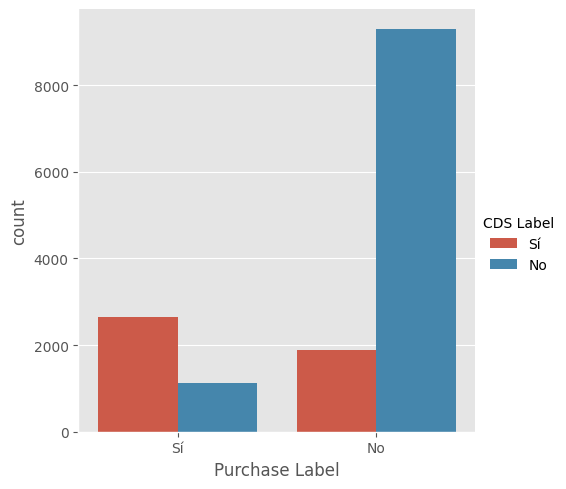

In [ ]:
# GRÁFICO
sns.catplot(x='Purchase Label',data=df_short,hue='CDS Label', kind="count")

# TABLA DE PROBABILIDADES
result_CDS = df_short[['CDS', 'Purchase']].groupby(['CDS'], as_index=False).agg(['count','sum','mean']).sort_values(by=('Purchase', 'mean'), ascending=False)
result_CDS = result_CDS.rename(columns={'mean': 'Probabilidad'})
print(result_CDS)

En la variable `CDS`, los clientes que `sí disponen de un certificado de depósito` tienen mayor probabilidad que `sí compre el certificado de depósito` respecto a los clientes que `no disponen de un certificado de depósito` (58.18% vs  10.88%), siendo esta probabilidad mayor que el `ratio general (25%)`.

### MMA

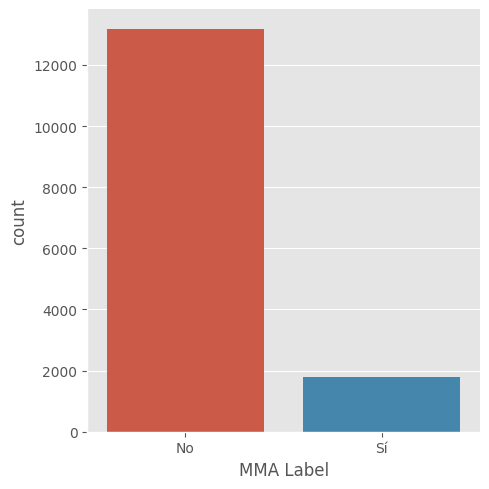

  Value  Frequency
0    No   0.880238
1    Sí   0.119762


In [ ]:
# GRÁFICO:
# Reemplaza los valores 0 y 1 en la columna por 'No' y 'Sí'
df_short['MMA Label'] = df_short['MMA'].replace({0: 'No', 1: 'Sí'})

# Crea el gráfico con la nueva columna
sns.catplot(x='MMA Label', data=df_short, kind="count")

plt.show()

# TABLA FRECUENCIAS
# Usando value_counts para obtener las frecuencias relativas y luego ordenándolas por índice
series_output = df_short['MMA'].value_counts(1).sort_index()

# Convirtiendo la serie en un DataFrame
df_output = series_output.reset_index()
df_output.columns = ['Value', 'Frequency']

# Reemplazar los valores 0 y 1 por 'No' y 'Sí'
df_output['Value'] = df_output['Value'].replace({0: 'No', 1: 'Sí'})

print(df_output)

En la variable `MMA` (Dispone el cliente de una cuenta en el Money Market Account (Cuenta de mercado monetario)), el valor de `Sí` tiene el 11.98% de casos del total de las observaciones

    Purchase                   
       count   sum Probabilidad
MMA                            
1       1792   860     0.479911
0      13171  2913     0.221168


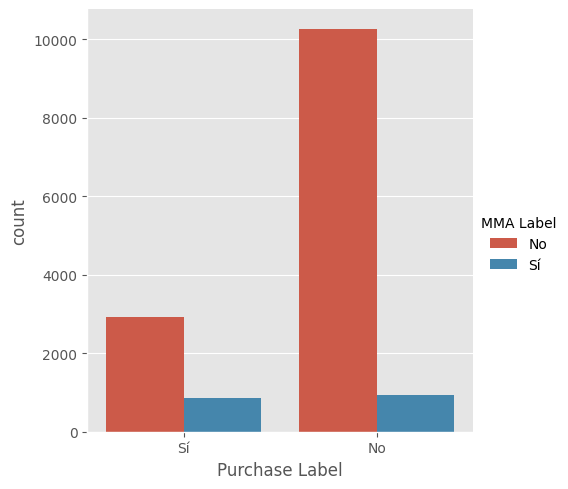

In [ ]:
# GRÁFICO
sns.catplot(x='Purchase Label',data=df_short,hue='MMA Label', kind="count")

# TABLA DE PROBABILIDADES
result_MMA = df_short[['MMA', 'Purchase']].groupby(['MMA'], as_index=False).agg(['count','sum','mean']).sort_values(by=('Purchase', 'mean'), ascending=False)
result_MMA = result_MMA.rename(columns={'mean': 'Probabilidad'})
print(result_MMA)

En la variable `MMA`, los clientes que `sí disponen de una cuenta en el Money Market Account` tienen mayor probabilidad que `sí compre el certificado de depósito` respecto a los clientes que `no disponen de una cuenta en el Money Market Account` (47.99% vs  22.12%), siendo esta probabilidad mayor que el `ratio general (25%)`.

### MTG

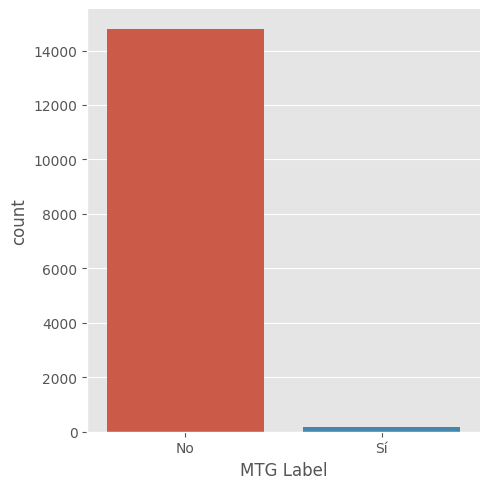

  Value  Frequency
0    No   0.988171
1    Sí   0.011829


In [ ]:
# GRÁFICO:
# Reemplaza los valores 0 y 1 en la columna por 'No' y 'Sí'
df_short['MTG Label'] = df_short['MTG'].replace({0: 'No', 1: 'Sí'})

# Crea el gráfico con la nueva columna
sns.catplot(x='MTG Label', data=df_short, kind="count")

plt.show()

# TABLA FRECUENCIAS
# Usando value_counts para obtener las frecuencias relativas y luego ordenándolas por índice
series_output = df_short['MTG'].value_counts(1).sort_index()

# Convirtiendo la serie en un DataFrame
df_output = series_output.reset_index()
df_output.columns = ['Value', 'Frequency']

# Reemplazar los valores 0 y 1 por 'No' y 'Sí'
df_output['Value'] = df_output['Value'].replace({0: 'No', 1: 'Sí'})

print(df_output)

En la variable `MTG` (Dispone el cliente de una hipoteca en el banco), el valor de `No` tiene el 98.82% de casos del total de las observaciones

    Purchase                   
       count   sum Probabilidad
MTG                            
0      14786  3743     0.253145
1        177    30     0.169492


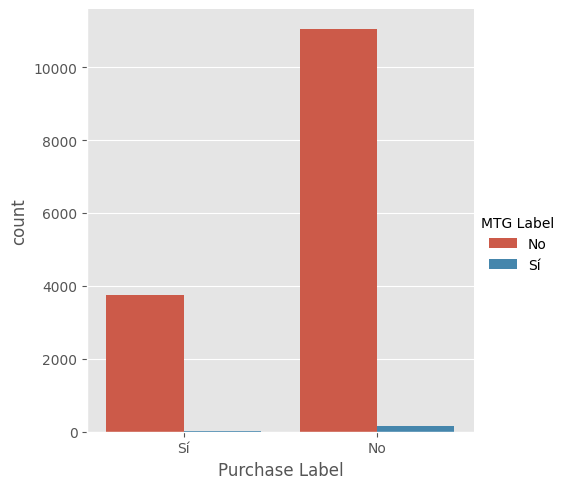

In [ ]:
# GRÁFICO
sns.catplot(x='Purchase Label',data=df_short,hue='MTG Label', kind="count")

# TABLA DE PROBABILIDADES
result = df_short[['MTG', 'Purchase']].groupby(['MTG'], as_index=False).agg(['count','sum','mean']).sort_values(by=('Purchase', 'mean'), ascending=False)
result = result.rename(columns={'mean': 'Probabilidad'})
print(result)

En la variable `MTG`, los clientes que `sí disponen de una hipoteca en el banco` tienen mayor probabilidad que `sí compre el certificado de depósito` respecto a los clientes que `no disponen de una hipoteca en el banco` (25.31% vs  16.95%), siendo esta probabilidad mayor que el `ratio general (25%)`.

### HMVAL

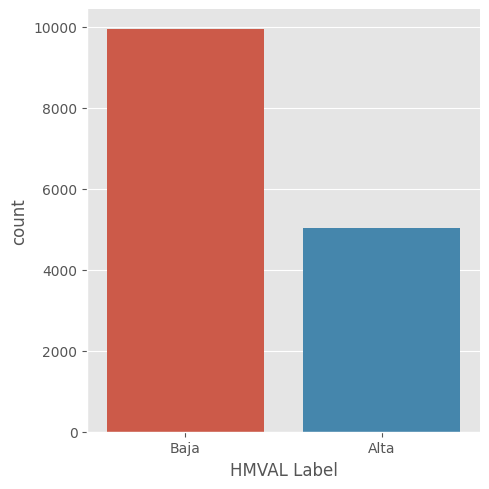

  Value  Frequency
0  Baja   0.664506
1  Alta   0.335494


In [ ]:
# Categorizamos la variable HMVAL
df_short['HMVAL Label'] = pd.cut(df_short['HMVAL'],
                                 bins=[-1, 3, 7],
                                 labels=['Baja', 'Alta'])

# GRÁFICO
# Crea el gráfico con la nueva columna
sns.catplot(x='HMVAL Label', data=df_short, kind="count")
plt.show()

# TABLA FRECUENCIAS
# Usando value_counts para obtener las frecuencias relativas y luego ordenándolas por índice
series_output = df_short['HMVAL Label'].value_counts(1).sort_index()

# Convirtiendo la serie en un DataFrame
df_output = series_output.reset_index()
df_output.columns = ['Value', 'Frequency']

print(df_output)

En la variable `HMVAL` (Escalas que representa el valor de la vivienda), el valor de `Baja` tiene el 66.45% de casos del total de las observaciones

            Purchase                   
               count   sum Probabilidad
HMVAL Label                            
Baja            9943  2719     0.273459
Alta            5020  1054     0.209960


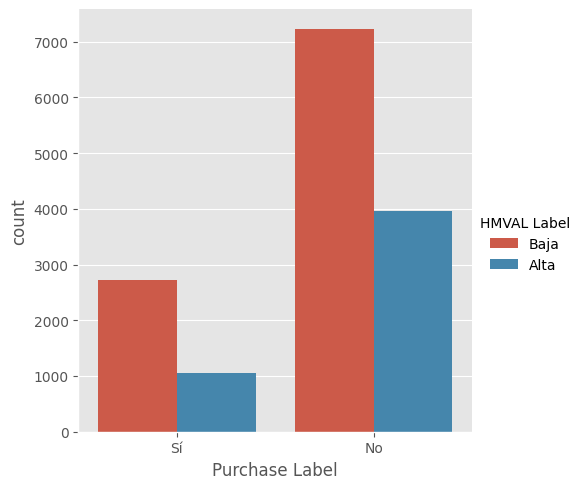

In [ ]:
# GRÁFICO
sns.catplot(x='Purchase Label',data=df_short,hue='HMVAL Label', kind="count")

# TABLA DE PROBABILIDADES
result = df_short[['HMVAL Label', 'Purchase']].groupby(['HMVAL Label'], as_index=False).agg(['count','sum','mean']).sort_values(by=('Purchase', 'mean'), ascending=False)
result = result.rename(columns={'mean': 'Probabilidad'})
print(result)

En la variable `HMVAL`, los clientes que `su valor de la vivienda bajo` tienen mayor probabilidad que `sí compre el certificado de depósito` respecto a los clientes que `su valor de la vivienda es alta` (27.35% vs 19.35%), siendo estas probabilidades mayores que el `ratio general (25%)`.

### INC

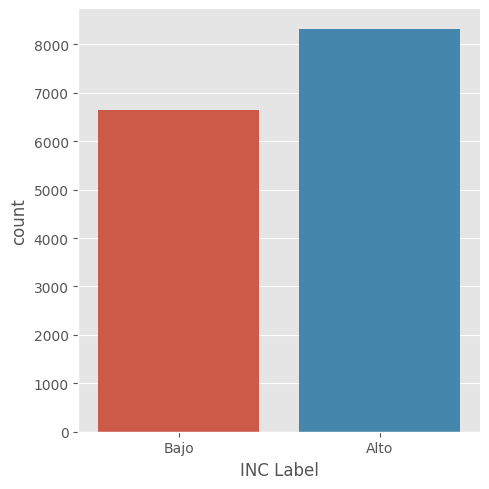

  Value  Frequency
0  Bajo   0.444296
1  Alto   0.555704


In [ ]:
# Categorizamos la variable INC
df_short['INC Label'] = pd.cut(df_short['INC'],
                                 bins=[-1, 4, 9],
                                 labels=['Bajo', 'Alto'])

# GRÁFICO
# Crea el gráfico con la nueva columna
sns.catplot(x='INC Label', data=df_short, kind="count")
plt.show()

# TABLA FRECUENCIAS
# Usando value_counts para obtener las frecuencias relativas y luego ordenándolas por índice
series_output = df_short['INC Label'].value_counts(1).sort_index()

# Convirtiendo la serie en un DataFrame
df_output = series_output.reset_index()
df_output.columns = ['Value', 'Frequency']

print(df_output)

En la variable `INC` (Escalas que representa el ingreso de los clientes), el valor de `Alto` tiene el 55.57% de casos del total de las observaciones

          Purchase                   
             count   sum Probabilidad
INC Label                            
Bajo          6648  1961     0.294976
Alto          8315  1812     0.217919


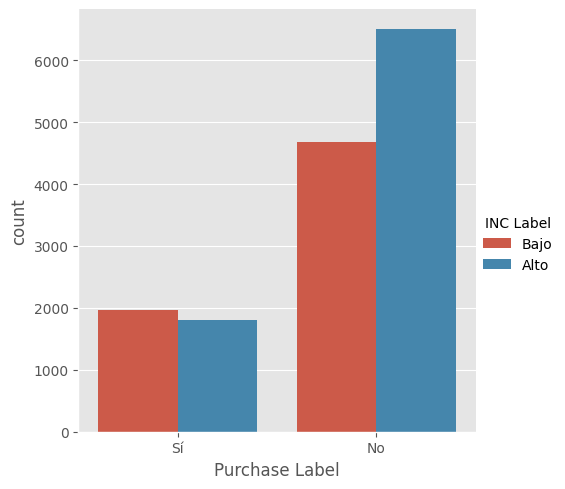

In [ ]:
# GRÁFICO
sns.catplot(x='Purchase Label',data=df_short,hue='INC Label', kind="count")

# TABLA DE PROBABILIDADES
result = df_short[['INC Label', 'Purchase']].groupby(['INC Label'], as_index=False).agg(['count','sum','mean']).sort_values(by=('Purchase', 'mean'), ascending=False)
result = result.rename(columns={'mean': 'Probabilidad'})
print(result)

En la variable `INC`, los clientes que son `ingresos bajos` tienen mayor probabilidad que `sí compre el certificado de depósito` respecto a los clientes que son`de ingresos  altos` (29.50% vs  21.79%), siendo esta probabilidad mayor que el `ratio general (25%)`.

### AGE

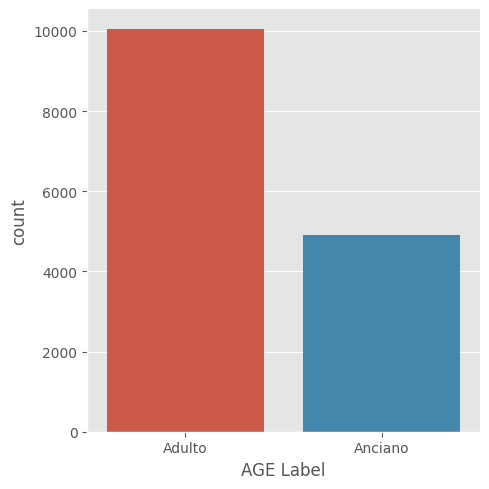

     Value  Frequency
0   Adulto   0.671389
1  Anciano   0.328611


In [ ]:
# Categorizamos la variable AGE
df_short['AGE Label'] = pd.cut(df_short['AGE'],
                                 bins=[-1, 4, 6],
                                 labels=['Adulto', 'Anciano'])

# GRÁFICO
# Crea el gráfico con la nueva columna
sns.catplot(x='AGE Label', data=df_short, kind="count")
plt.show()

# TABLA FRECUENCIAS
# Usando value_counts para obtener las frecuencias relativas y luego ordenándolas por índice
series_output = df_short['AGE Label'].value_counts(1).sort_index()

# Convirtiendo la serie en un DataFrame
df_output = series_output.reset_index()
df_output.columns = ['Value', 'Frequency']

print(df_output)

En la variable `AGE` (Escalas que representa la edad del cliente), el valor de `Adulto` tiene el 67.14% de casos del total de las observaciones

          Purchase                   
             count   sum Probabilidad
AGE Label                            
Anciano       4917  2138     0.434818
Adulto       10046  1635     0.162751


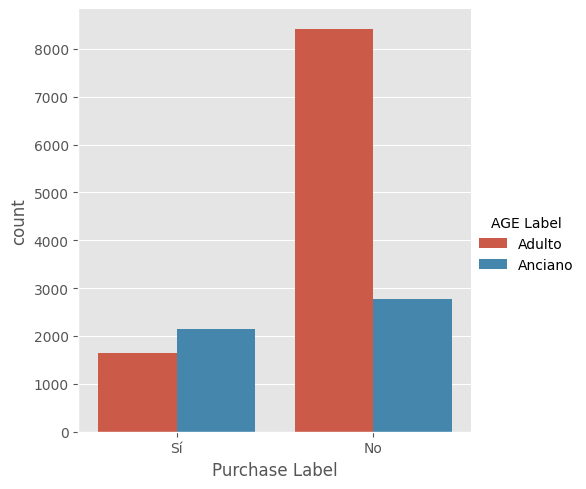

In [ ]:
# GRÁFICO
sns.catplot(x='Purchase Label',data=df_short,hue='AGE Label', kind="count")

# TABLA DE PROBABILIDADES
result_AGE = df_short[['AGE Label', 'Purchase']].groupby(['AGE Label'], as_index=False).agg(['count','sum','mean']).sort_values(by=('Purchase', 'mean'), ascending=False)
result_AGE = result_AGE.rename(columns={'mean': 'Probabilidad'})
print(result_AGE)

En la variable `AGE`, los clientes que son `ancianos` tienen mayor probabilidad que `sí compre el certificado de depósito` respecto a los clientes que son`adultos` (43.48% vs 16.28%), siendo esta probabilidad mayor que el `ratio general (25%)`.

### LOR

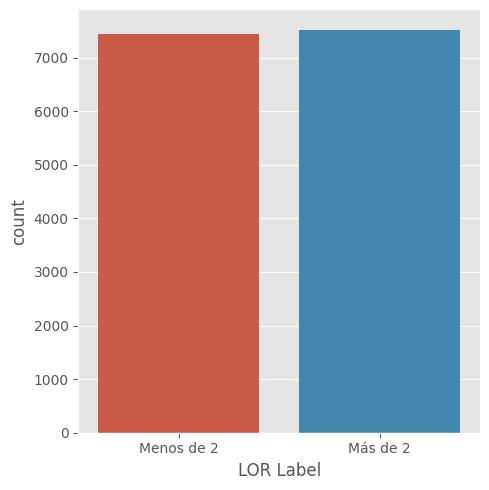

        Value  Frequency
0  Menos de 2   0.497828
1    Más de 2   0.502172


In [ ]:
# Categorizamos la variable LOR
df_short['LOR Label'] = pd.cut(df_short['LOR'],
                                 bins=[-1, 2, 5],
                                 labels=['Menos de 2', 'Más de 2'])

# GRÁFICO
# Crea el gráfico con la nueva columna
sns.catplot(x='LOR Label', data=df_short, kind="count")
plt.show()

# TABLA FRECUENCIAS
# Usando value_counts para obtener las frecuencias relativas y luego ordenándolas por índice
series_output = df_short['LOR Label'].value_counts(1).sort_index()

# Convirtiendo la serie en un DataFrame
df_output = series_output.reset_index()
df_output.columns = ['Value', 'Frequency']

print(df_output)

En la variable `LOR` (Numero de cartas de referencia, ), el valor de `Menos de dos cartas` tiene el 49.78%  y el valor de `Más de dos cartas` tiene 50.22% de casos del total de las observaciones, donde se logra visualizar que tienen observaciones casi parejas.

           Purchase                   
              count   sum Probabilidad
LOR Label                             
Más de 2       7514  2284     0.303966
Menos de 2     7449  1489     0.199893


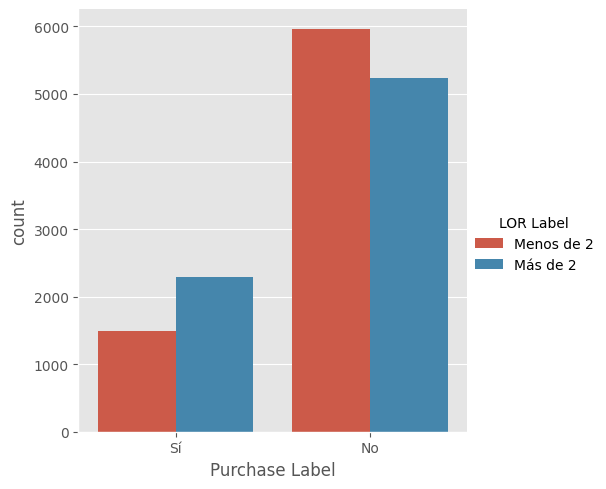

In [ ]:
# GRÁFICO
sns.catplot(x='Purchase Label',data=df_short,hue='LOR Label', kind="count")

# TABLA DE PROBABILIDADES
result = df_short[['LOR Label', 'Purchase']].groupby(['LOR Label'], as_index=False).agg(['count','sum','mean']).sort_values(by=('Purchase', 'mean'), ascending=False)
result = result.rename(columns={'mean': 'Probabilidad'})
print(result)

En la variable `LOR`, los clientes que tienen `más de dos cartas de referencia` tienen mayor probabilidad que `sí compre el certificado de depósito` respecto a los clientes que tienen `menos de dos cartas de referencia` (30.40% vs 19.99%), siendo esta probabilidad mayor que el `ratio general (25%)`.

### CHLD

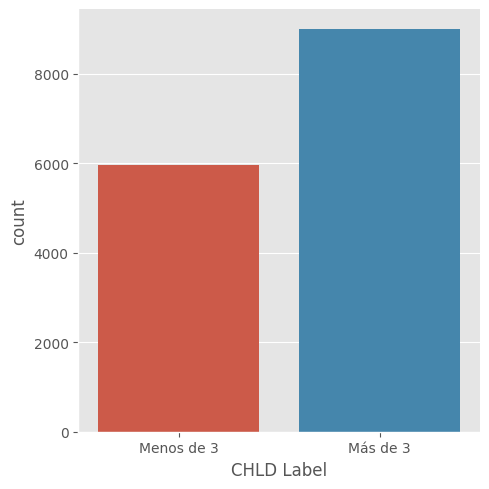

        Value  Frequency
0  Menos de 3   0.398383
1    Más de 3   0.601617


In [ ]:
# Categorizamos la variable CHLD
df_short['CHLD Label'] = pd.cut(df_short['CHLD'],
                                 bins=[-1, 3, 6],
                                 labels=['Menos de 3', 'Más de 3'])

# GRÁFICO
# Crea el gráfico con la nueva columna
sns.catplot(x='CHLD Label', data=df_short, kind="count")
plt.show()

# TABLA FRECUENCIAS
# Usando value_counts para obtener las frecuencias relativas y luego ordenándolas por índice
series_output = df_short['CHLD Label'].value_counts(1).sort_index()

# Convirtiendo la serie en un DataFrame
df_output = series_output.reset_index()
df_output.columns = ['Value', 'Frequency']

print(df_output)

En la variable `CHLD` (Numero de hijos), el valor de `Más de tres hijos` tiene el 60.16%  de casos del total de las observaciones.

           Purchase                   
              count   sum Probabilidad
CHLD Label                            
Más de 3       9002  2625     0.291602
Menos de 3     5961  1148     0.192585


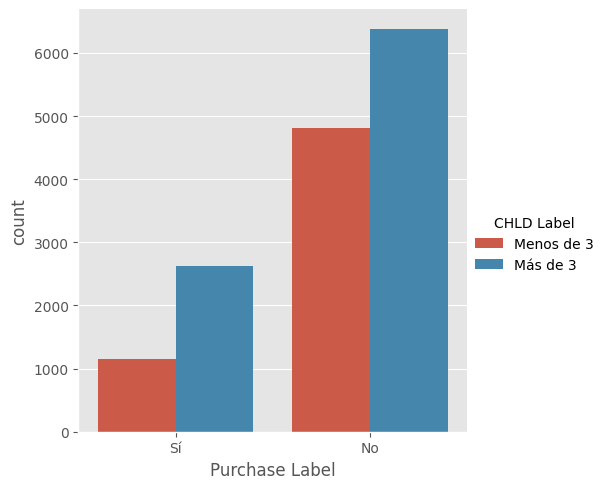

In [ ]:
# GRÁFICO
sns.catplot(x='Purchase Label',data=df_short,hue='CHLD Label', kind="count")

# TABLA DE PROBABILIDADES
result = df_short[['CHLD Label', 'Purchase']].groupby(['CHLD Label'], as_index=False).agg(['count','sum','mean']).sort_values(by=('Purchase', 'mean'), ascending=False)
result = result.rename(columns={'mean': 'Probabilidad'})
print(result)

En la variable `CHLD`, los clientes que tienen `más de tres hijos` tienen mayor probabilidad que `sí compre el certificado de depósito` respecto a los clientes que tienen `menos de tres hijos` (29.16% vs 19.26%), siendo esta probabilidad mayor que el `ratio general (25%)`.

# TABLA DE CONTINGENCIAS Y GRÁFICOS

## Tabla de Contingencia, prueba de independencia gráfica

### Purchase - CHFREE

Tabla de contingencia:
Purchase Label     No     Sí
CHFREE Label                
No              74.31  25.69
Sí              78.52  21.48


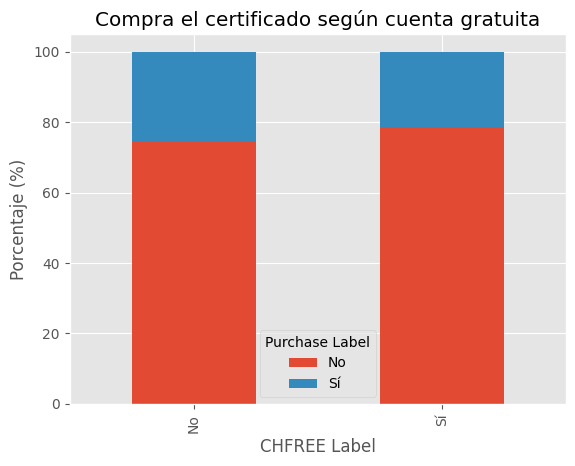

In [ ]:
# Crear tabla de contingencia de frecuencias relativas en porcentajes
ct = pd.crosstab(index=df_short['CHFREE Label'], columns=df_short['Purchase Label'])
ct_percentage_CHFREE = (ct.T / ct.sum(axis=1)).T * 100
print(f'Tabla de contingencia:\n{ct_percentage_CHFREE.round(2)}')

# Gráfico de barras
plot = ct_percentage_CHFREE.plot(kind='bar', stacked=True)
plt.title('Compra el certificado según cuenta gratuita')
plt.ylabel('Porcentaje (%)')
plt.show()

La distribución no cambia, quiere decir que la LA DISPONIBILIDAD DE CUENTA GRATUITA no afecta a la probabilidad que una persona COMPRE EL CERTIFICADO

Esto podría interpretarse gráficamente como una indicación de que las variables son independientes.

### Purchase - SAVINGS

Tabla de contingencia:
Purchase Label     No     Sí
SAVINGS Label               
No              77.83  22.17
Sí              56.04  43.96


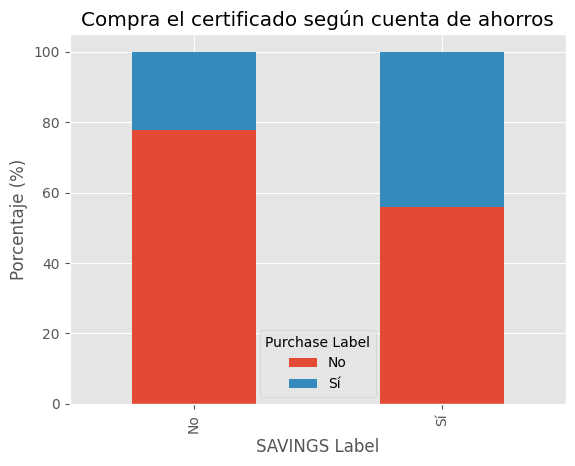

In [ ]:
# Crear tabla de contingencia de frecuencias relativas en porcentajes
ct = pd.crosstab(index=df_short['SAVINGS Label'], columns=df_short['Purchase Label'])
ct_percentage_SAVINGS = (ct.T / ct.sum(axis=1)).T * 100
print(f'Tabla de contingencia:\n{ct_percentage_SAVINGS.round(2)}')

# Gráfico de barras
plot = ct_percentage_SAVINGS.plot(kind='bar', stacked=True)
plt.title('Compra el certificado según cuenta de ahorros')
plt.ylabel('Porcentaje (%)')
plt.show()

La distribución cambia, quiere decir que la LA DISPONIBILIDAD DE CUENTA DE AHORRO sí afecta a la probabilidad que una persona COMPRE EL CERTIFICADO

### Purchase - CDS

Tabla de contingencia:
Purchase Label     No     Sí
CDS Label                   
No              89.12  10.88
Sí              41.82  58.18


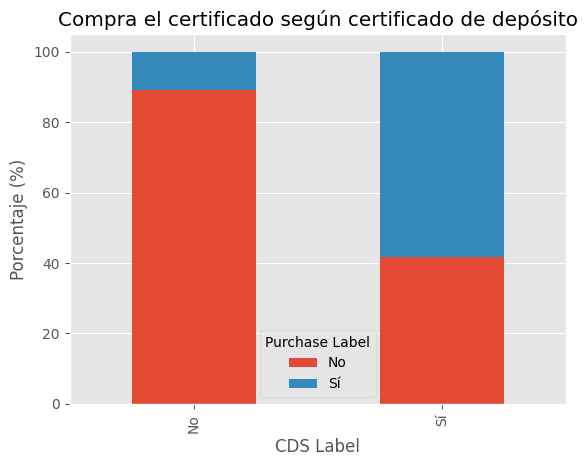

In [ ]:
# Crear tabla de contingencia de frecuencias relativas en porcentajes
ct = pd.crosstab(index=df_short['CDS Label'], columns=df_short['Purchase Label'])
ct_percentage_CDS = (ct.T / ct.sum(axis=1)).T * 100
print(f'Tabla de contingencia:\n{ct_percentage_CDS.round(2)}')

# Gráfico de barras
plot = ct_percentage_CDS.plot(kind='bar', stacked=True)
plt.title('Compra el certificado según certificado de depósito')
plt.ylabel('Porcentaje (%)')
plt.show()

La distribución cambia, quiere decir que la LA DISPONIBILIDAD DE CERTIFICADO DE DEPÓSITO sí afecta a la probabilidad que una persona COMPRE EL CERTIFICADO

### Purchase - MMA

Tabla de contingencia:
Purchase Label     No     Sí
MMA Label                   
No              77.88  22.12
Sí              52.01  47.99


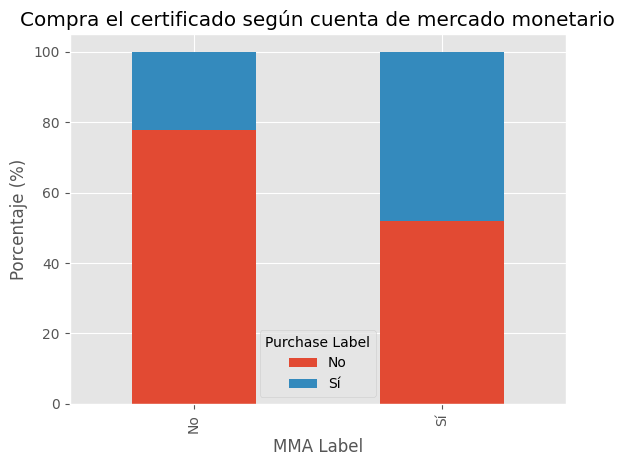

In [ ]:
# Crear tabla de contingencia de frecuencias relativas en porcentajes
ct = pd.crosstab(index=df_short['MMA Label'], columns=df_short['Purchase Label'])
ct_percentage_MMA = (ct.T / ct.sum(axis=1)).T * 100
print(f'Tabla de contingencia:\n{ct_percentage_MMA.round(2)}')

# Gráfico de barras
plot = ct_percentage_MMA.plot(kind='bar', stacked=True)
plt.title('Compra el certificado según cuenta de mercado monetario')
plt.ylabel('Porcentaje (%)')
plt.show()

La distribución cambia, quiere decir que la LA DISPONIBILIDAD DE CUENTA DE MERCADO MONETARIO sí afecta a la probabilidad que una persona COMPRE EL CERTIFICADO

### Purchase - MTG

Tabla de contingencia:
Purchase Label     No     Sí
MTG Label                   
No              74.69  25.31
Sí              83.05  16.95


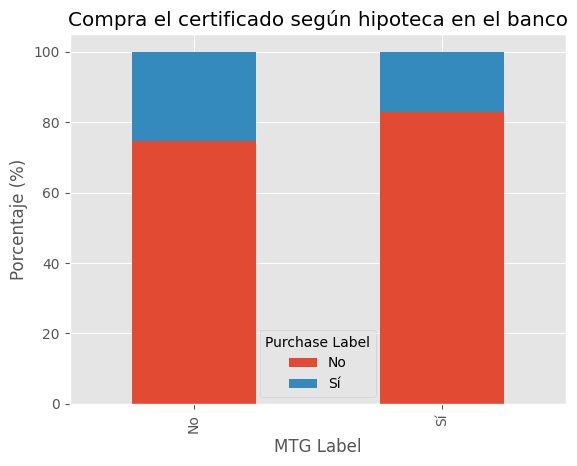

In [ ]:
# Crear tabla de contingencia de frecuencias relativas en porcentajes
ct = pd.crosstab(index=df_short['MTG Label'], columns=df_short['Purchase Label'])
ct_percentage_MTG = (ct.T / ct.sum(axis=1)).T * 100
print(f'Tabla de contingencia:\n{ct_percentage_MTG.round(2)}')

# Gráfico de barras
plot = ct_percentage_MTG.plot(kind='bar', stacked=True)
plt.title('Compra el certificado según hipoteca en el banco')
plt.ylabel('Porcentaje (%)')
plt.show()

La distribución cambia ligeramente, quiere decir probablemente que la LA DISPONIBILIDAD DE HIPOTECA EN EL BANCO sí afecta a la probabilidad que una persona COMPRE EL CERTIFICADO.

Esto podría interpretarse gráficamente como una indicación de que las variables son independientes, pero dicha acotación se hará con el estadístico chi cuadrado.

### Purchase - HMVAL

Tabla de contingencia:
Purchase Label     No     Sí
HMVAL Label                 
Baja            72.65  27.35
Alta            79.00  21.00


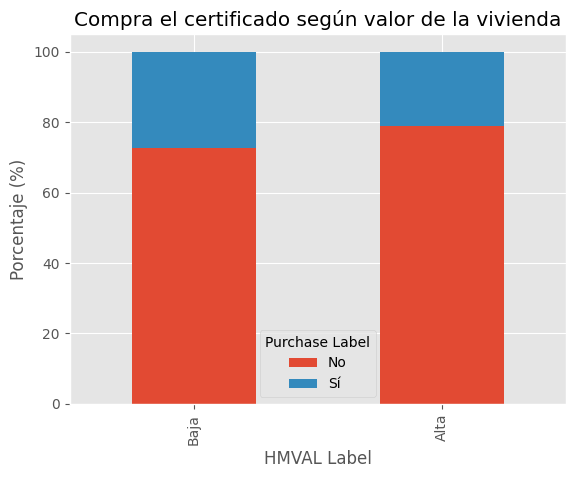

In [ ]:
# Crear tabla de contingencia de frecuencias relativas en porcentajes
ct = pd.crosstab(index=df_short['HMVAL Label'], columns=df_short['Purchase Label'])
ct_percentage_HMVAL = (ct.T / ct.sum(axis=1)).T * 100
print(f'Tabla de contingencia:\n{ct_percentage_HMVAL.round(2)}')

# Gráfico de barras
plot = ct_percentage_HMVAL.plot(kind='bar', stacked=True)
plt.title('Compra el certificado según valor de la vivienda')
plt.ylabel('Porcentaje (%)')
plt.show()

La distribución cambia ligeramente, quiere decir que probablemente EL VALOR DE LA VIVIENDA sí afecta a la probabilidad que una persona COMPRE EL CERTIFICADO

Esto podría interpretarse gráficamente como una indicación de que las variables son independientes, pero dicha acotación se hará con el estadístico chi cuadrado.

### Purchase - INC

Tabla de contingencia:
Purchase Label     No     Sí
INC Label                   
Bajo            70.50  29.50
Alto            78.21  21.79


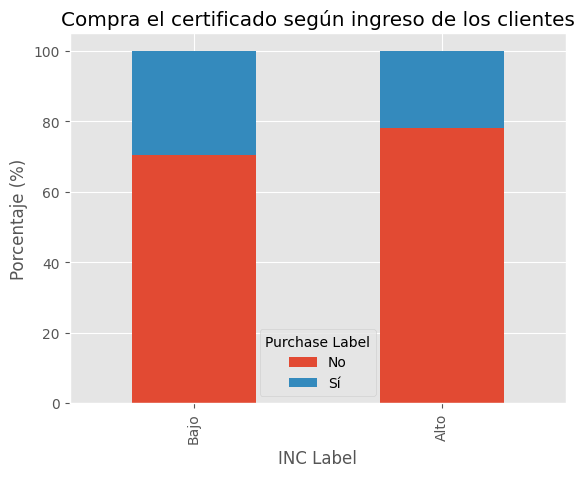

In [ ]:
# Crear tabla de contingencia de frecuencias relativas en porcentajes
ct = pd.crosstab(index=df_short['INC Label'], columns=df_short['Purchase Label'])
ct_percentage_INC = (ct.T / ct.sum(axis=1)).T * 100
print(f'Tabla de contingencia:\n{ct_percentage_INC.round(2)}')

# Gráfico de barras
plot = ct_percentage_INC.plot(kind='bar', stacked=True)
plt.title('Compra el certificado según ingreso de los clientes')
plt.ylabel('Porcentaje (%)')
plt.show()

La distribución cambia ligeramente, quiere decir que probablemente EL INGRESO DE LOS CLIENTES sí afecta a la probabilidad que una persona COMPRE EL CERTIFICADO.

Esto podría interpretarse gráficamente como una indicación de que las variables son independientes, pero dicha acotación se hará con el estadístico chi cuadrado.

### Purchase - AGE

Tabla de contingencia:
Purchase Label     No     Sí
AGE Label                   
Adulto          83.72  16.28
Anciano         56.52  43.48


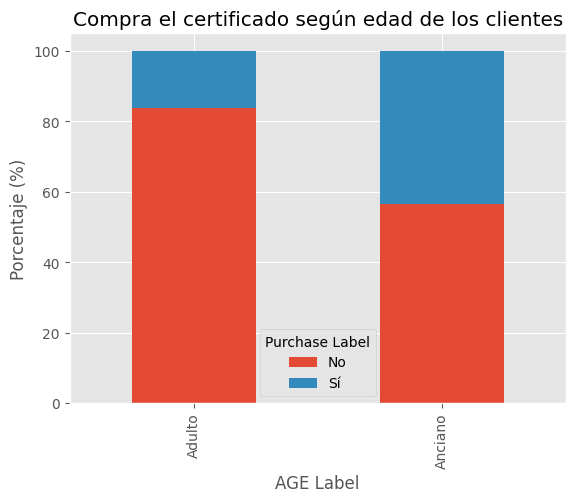

In [ ]:
# Crear tabla de contingencia de frecuencias relativas en porcentajes
ct = pd.crosstab(index=df_short['AGE Label'], columns=df_short['Purchase Label'])
ct_percentage_AGE = (ct.T / ct.sum(axis=1)).T * 100
print(f'Tabla de contingencia:\n{ct_percentage_AGE.round(2)}')

# Gráfico de barras
plot = ct_percentage_AGE.plot(kind='bar', stacked=True)
plt.title('Compra el certificado según edad de los clientes')
plt.ylabel('Porcentaje (%)')
plt.show()

La distribución cambia, quiere decir que LA EDAD DE LOS CLIENTES sí afecta a la probabilidad que una persona COMPRE EL CERTIFICADO

### Purchase - LOR

Tabla de contingencia:
Purchase Label     No     Sí
LOR Label                   
Menos de 2      80.01  19.99
Más de 2        69.60  30.40


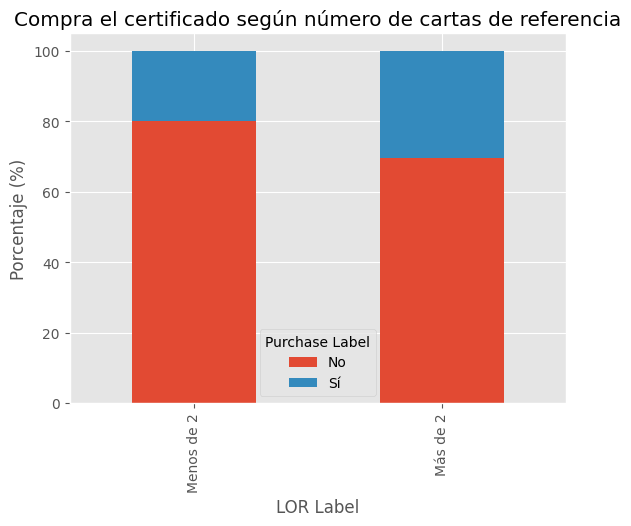

In [ ]:
# Crear tabla de contingencia de frecuencias relativas en porcentajes
ct = pd.crosstab(index=df_short['LOR Label'], columns=df_short['Purchase Label'])
ct_percentage_LOR = (ct.T / ct.sum(axis=1)).T * 100
print(f'Tabla de contingencia:\n{ct_percentage_LOR.round(2)}')

# Gráfico de barras
plot = ct_percentage_LOR.plot(kind='bar', stacked=True)
plt.title('Compra el certificado según número de cartas de referencia')
plt.ylabel('Porcentaje (%)')
plt.show()

La distribución cambia ligeramente, quiere decir que probablemente EL NUMERO DE CARTAS DE REFERENCIA sí afecta a la probabilidad que una persona COMPRE EL CERTIFICADO.

Esto podría interpretarse gráficamente como una indicación de que las variables son independientes, pero dicha acotación se hará con el estadístico chi cuadrado.

### Purchase - CHLD

Tabla de contingencia:
Purchase Label     No     Sí
CHLD Label                  
Menos de 3      80.74  19.26
Más de 3        70.84  29.16


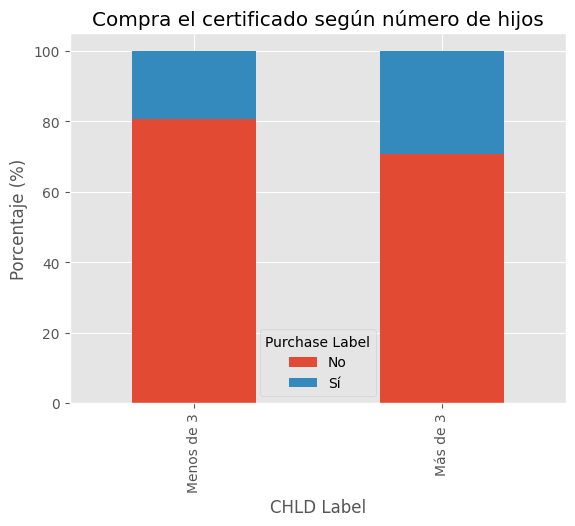

In [ ]:
# Crear tabla de contingencia de frecuencias relativas en porcentajes
ct = pd.crosstab(index=df_short['CHLD Label'], columns=df_short['Purchase Label'])
ct_percentage_CHLD = (ct.T / ct.sum(axis=1)).T * 100
print(f'Tabla de contingencia:\n{ct_percentage_CHLD.round(2)}')

# Gráfico de barras
plot = ct_percentage_CHLD.plot(kind='bar', stacked=True)
plt.title('Compra el certificado según número de hijos')
plt.ylabel('Porcentaje (%)')
plt.show()

La distribución cambia ligeramente, quiere decir que probablemente EL NUMERO DE HIJOS sí afecta a la probabilidad que una persona COMPRE EL CERTIFICADO.

Esto podría interpretarse gráficamente como una indicación de que las variables son independientes, pero dicha acotación se hará con el estadístico chi cuadrado.


# INDEPENDENCIA

In [ ]:
from scipy.stats import chi2_contingency

def test_chi2(table, alpha=0.05):
    # Calculando el p-value usando chi2_contingency
    p_value = chi2_contingency(table)[1]

    # Comparando el p-value con alpha
    if p_value < alpha:
        result = f"p-value: {p_value:.4f} - Rechazar H0, entonces las variables están relacionadas."
    else:
        result = f"p-value: {p_value:.4f} - No rechazar H0, entonces las variables son independientes."

    return result

In [ ]:
result = test_chi2(ct_percentage_CHFREE)
print(result)

p-value: 0.5932 - No rechazar H0, entonces las variables son independientes.


In [ ]:
result = test_chi2(ct_percentage_SAVINGS)
print(result)

p-value: 0.0018 - Rechazar H0, entonces las variables están relacionadas.


In [ ]:
result = test_chi2(ct_percentage_CDS)
print(result)

p-value: 0.0000 - Rechazar H0, entonces las variables están relacionadas.


In [ ]:
result = test_chi2(ct_percentage_MMA)
print(result)

p-value: 0.0002 - Rechazar H0, entonces las variables están relacionadas.


In [ ]:
result = test_chi2(ct_percentage_MTG)
print(result)

p-value: 0.2021 - No rechazar H0, entonces las variables son independientes.


In [ ]:
result = test_chi2(ct_percentage_HMVAL)
print(result)

p-value: 0.3769 - No rechazar H0, entonces las variables son independientes.


In [ ]:
result = test_chi2(ct_percentage_INC)
print(result)

p-value: 0.2775 - No rechazar H0, entonces las variables son independientes.


In [ ]:
result = test_chi2(ct_percentage_AGE)
print(result)

p-value: 0.0001 - Rechazar H0, entonces las variables están relacionadas.


In [ ]:
result = test_chi2(ct_percentage_LOR)
print(result)

p-value: 0.1255 - No rechazar H0, entonces las variables son independientes.


In [ ]:
result = test_chi2(ct_percentage_CHLD)
print(result)

p-value: 0.1417 - No rechazar H0, entonces las variables son independientes.


## REVISANDO LA CORRELACION DE LAS VARIABLES BINOMIALES CATEGORIZADAS

In [ ]:
columns_to_encode = ['Purchase Label','CHFREE Label','SAVINGS Label','CDS Label','MMA Label','MTG Label','HMVAL Label','INC Label','AGE Label','LOR Label','CHLD Label']

df_bi_cod = df_short[columns_to_encode ].copy()

for col in columns_to_encode:
    df_bi_cod[f'{col}'] = df_bi_cod[f'{col}'].astype('category').cat.codes

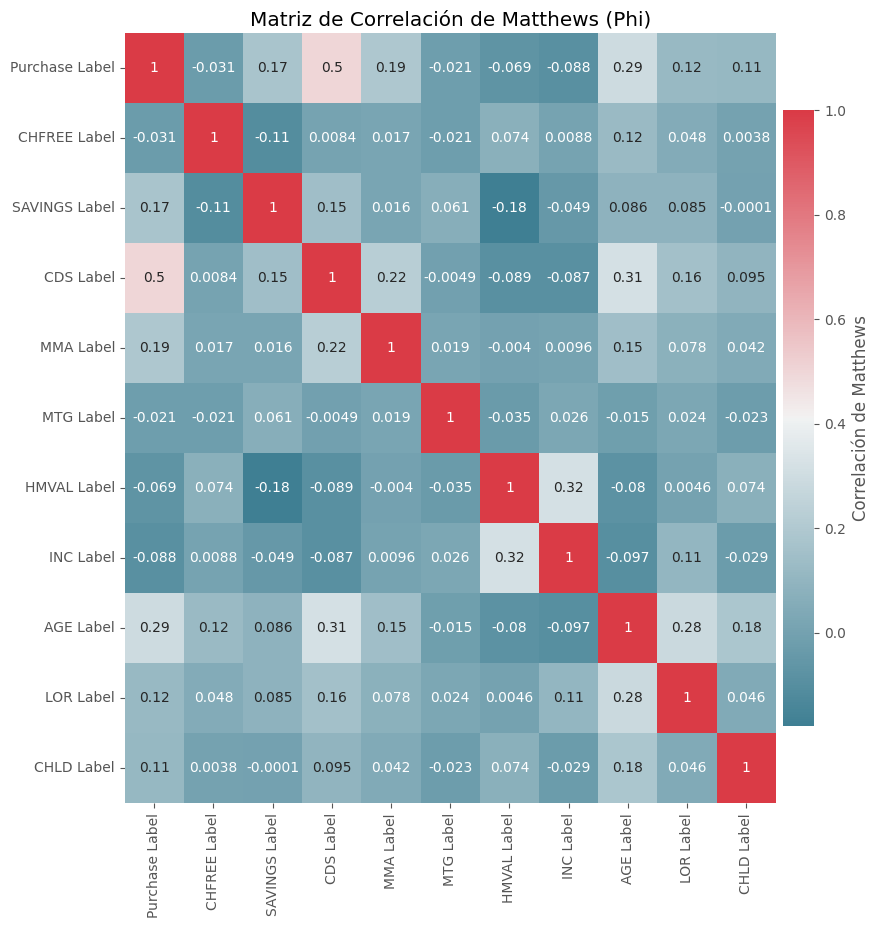

In [ ]:
# Crea un DataFrame vacío para la matriz de correlación de Matthews
mcc_corr = pd.DataFrame(index=df_bi_cod.columns, columns=df_bi_cod.columns)

# Rellena el DataFrame con los valores del coeficiente de Matthews para cada par de columnas
for col1 in df_bi_cod.columns:
    for col2 in df_bi_cod.columns:
        mcc_corr.loc[col1, col2] = matthews_corrcoef(df_bi_cod[col1], df_bi_cod[col2])

# Convierte el DataFrame a tipo float
mcc_corr = mcc_corr.astype(float).round(4)

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Mostrar la matriz de correlación
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(mcc_corr, annot=True, cmap=cmap, cbar_kws={'label': 'Correlación de Matthews', 'pad': 0.01, 'shrink': 0.8}, ax=ax)

# Título
ax.set_title("Matriz de Correlación de Matthews (Phi)")

plt.show()

Con base en los análisis estadísticos y haciendo uso del coeficiente PHI de Matthews, se puede establecer que los valores dentro del rango [-0.12, 0.12] corresponden a variables que no guardan relación (son independientes) con el target.

La evidencia estadística disponible es contundente para identificar variables independientes y aquellas que están vinculadas con el target.

Para dicha evaluación se ha dicotomizado todas las variables.

# RESUMEN DE PROBABILIDADES

El resumen es de las variables que están asociadas con el target, para determinar el score de las variables más influyentes.

In [ ]:
pivot_df_SAVINGS = result_SAVINGS['Purchase']['Probabilidad'].reset_index().pivot_table(columns='SAVINGS', values='Probabilidad')
pivot_df_SAVINGS.columns = ['Nivel1', 'Nivel2']
pivot_df_SAVINGS.index = ['SAVINGS']

In [ ]:
pivot_df_CDS = result_CDS['Purchase']['Probabilidad'].reset_index().pivot_table(columns='CDS', values='Probabilidad')
pivot_df_CDS.columns = ['Nivel1', 'Nivel2']
pivot_df_CDS.index = ['CDS']

In [ ]:
pivot_df_MMA = result_MMA['Purchase']['Probabilidad'].reset_index().pivot_table(columns='MMA', values='Probabilidad')
pivot_df_MMA.columns = ['Nivel1', 'Nivel2']
pivot_df_MMA.index = ['MMA']

In [ ]:
pivot_df_AGE = result_AGE['Purchase']['Probabilidad'].reset_index().pivot_table(columns='AGE Label', values='Probabilidad')
pivot_df_AGE.columns = ['Nivel1', 'Nivel2']
pivot_df_AGE.index = ['AGE']

## RANKING DE VARIABLES ASOCIADAS

In [ ]:
# RESUMEN
combined_df = pd.concat([pivot_df_SAVINGS, pivot_df_CDS, pivot_df_MMA, pivot_df_AGE], axis=0)
combined_df['ratio'] = combined_df['Nivel2'] / combined_df['Nivel1']

combined_df = combined_df.sort_values(by='ratio', ascending=False)
combined_df

,Nivel1,Nivel2,ratio
CDS,0.108831,0.581826,5.346137
AGE,0.162751,0.434818,2.671671
MMA,0.221168,0.479911,2.169895
SAVINGS,0.221678,0.439560,1.982875


La variable `CDS`, que indica si `dispone el cliente de un certificado de deposito`, es la que ejerce mayor influencia sobre el target. Esta afirmación se respalda por la elevada correlación existente entre ambas variables.

# DRISTRIBUCIÓN BINOMIAL

In [ ]:
# TABLA FRECUENCIAS
# Usando value_counts para obtener las frecuencias relativas y luego ordenándolas por índice
series_output = df_short['Purchase'].value_counts(1).sort_index()

# Convirtiendo la serie en un DataFrame
df_output = series_output.reset_index()
df_output.columns = ['Value', 'Frequency']

# Reemplazar los valores 0 y 1 por 'No' y 'Sí'
df_output['Value'] = df_output['Value'].replace({0: 'No', 1: 'Sí'})

print(df_output)

  Value  Frequency
0    No   0.747845
1    Sí   0.252155


In [ ]:
# De 20 registros, cual es la probabilidad que 10 personas compren el certificado
# Definir parámetros
size = 20
prob = df_output['Frequency'][1]

# Calcular probabilidad usando la función de densidad binomial
fx = binom.pmf(10, size, prob)

print(f"La probabilidad que 10 personas compren es: {fx}")


La probabilidad que 10 personas compren es: 0.010504949033246813
